# 1. Importing Libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# 2. Importing dataset

In [2]:
df = pd.read_csv("song_data.csv")

In [3]:
df.tail()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
18830,Let It Breathe,60,159645,0.893,0.500,0.151,0.000065,11,0.111,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765,0.495,0.161,0.000001,11,0.105,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847,0.719,0.325,0.000000,0,0.125,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945,0.488,0.326,0.015700,3,0.119,-12.020,1,0.0328,106.063,4,0.323
18834,Up to Me,60,193533,0.911,0.640,0.381,0.000254,4,0.104,-11.790,1,0.0302,91.490,4,0.581


# 3. Data Exploration

In [4]:
df.shape

(18835, 15)

In [5]:
df.key.nunique()

12

In [6]:
df.audio_mode.nunique()

2

In [7]:
df.time_signature.nunique()

5

In [8]:
categorical_features = ["key", "audio_mode", "time_signature"]
numerical_features = [col for col in df.columns if col not in categorical_features and col != "song_name" and 
                      col!= "song_popularity"]

In [9]:
numerical_features

['song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'audio_valence']

In [10]:
n_nf = len(numerical_features)
n_cf = len(categorical_features)
n_nf, n_cf

(10, 3)

In [11]:
df.nunique()

song_name           13070
song_popularity       101
song_duration_ms    11771
acousticness         3209
danceability          849
energy               1132
instrumentalness     3925
key                    12
liveness             1425
loudness             8416
audio_mode              2
speechiness          1224
tempo               12112
time_signature          5
audio_valence        1246
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


- Total features : 13
- Categorical features : 3 - ["key, "audio_mode", "time_signature"]
- Numerical features : 10 - ['song_duration_ms','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',    'loudness', 'speechiness', 'tempo', 'audio_valence']
- Target variable : song_popularity
- No Nan values
- Dtypes : float64(9), int64(5), object(1)
- memory usage: 2.2+ MB

# 4. Data Cleaning

In [13]:
# making a copy of original dataset
df1 = df.copy()

In [14]:
# checking for nan values
df1.isna().sum().sort_values(ascending=True)

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [15]:
# shape before removing duplicates
x1,y1 = df1.shape
x1,y1

(18835, 15)

In [16]:
# removing duplicates and resetting index
df1 = df1.drop_duplicates()
df1 = df1.reset_index()

In [17]:
# shape after removing duplicates
x2,y2 = df1.shape
x2,y2

(14926, 16)

In [18]:
# calculating the number of duplicates
no_duplicates = x1-x2
no_duplicates

3909

In [19]:
df1.head(2)

,index,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370


In [20]:
# removing the index column generated during removal of duplicates
df1 = df1.drop("index",axis=1)

In [21]:
df1.head(2)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370


In [22]:
df1.shape

(14926, 15)

# 5. Exploratory Data Analysis

In [23]:
df2 = df1.copy()

In [24]:
df2.head(2)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370


## 5.1 Visualizing categorical features

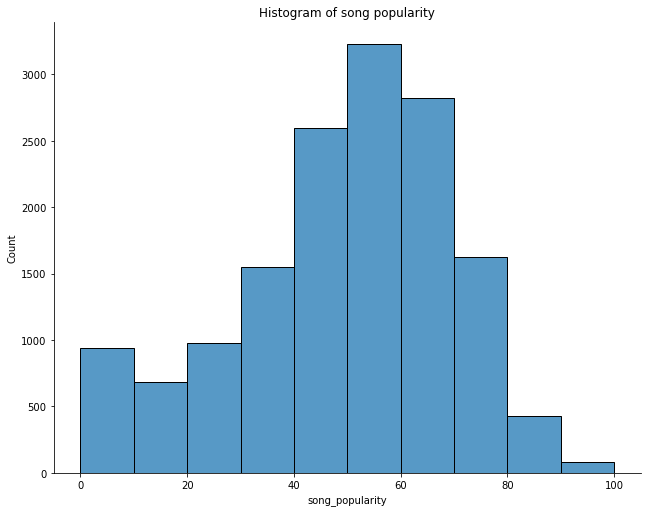

In [25]:
# distribution plot of song_popularity
sns.displot(df2["song_popularity"], height=7,aspect=1.3, bins=10).set(title="Histogram of song popularity")
plt.show()

- This plot shows that the average song popularity lies around 50 to 70

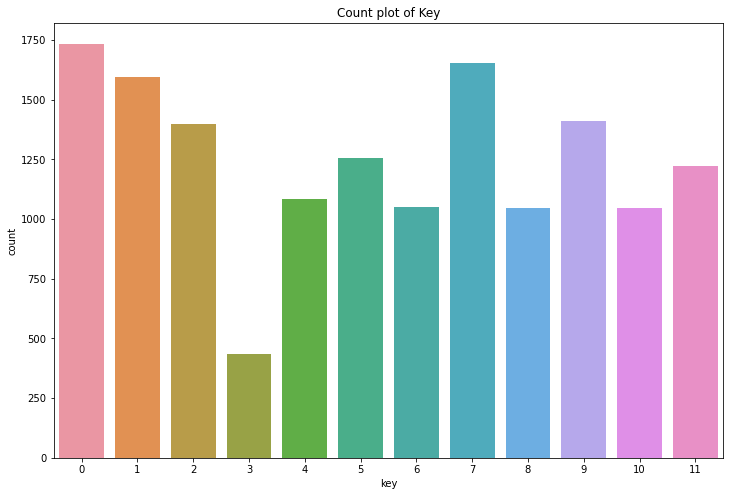

In [30]:
# count plot of categorical feature "key"
plt.figure(figsize=(12,8))
sns.countplot(x="key", data=df2).set(title="Count plot of Key")
plt.show()

- Above plot shows that the maximum number of songs have a key value of 0 and the minimum number of songs have the key value of 3

In [68]:
len(df2[df2.audio_mode==1])

9432

In [69]:
len(df2[df2.audio_mode==0])

5494

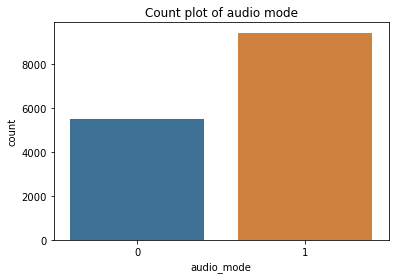

In [35]:
# count plot of categorical feature "audio_mode"
sns.countplot(x="audio_mode", data=df2,saturation=0.6).set(title="Count plot of audio mode")
plt.show()

- Above graph shows that 9432 songs have audio_mode 1 and the rest 5494 have audio_mode 0

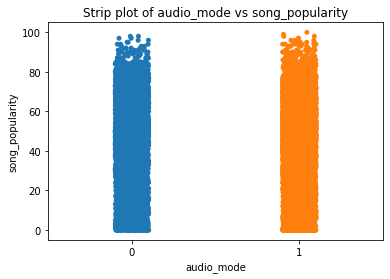

In [95]:
# strip plot of audio_mode vs song_popularity
sns.stripplot(x="audio_mode", y="song_popularity", data=df2).set(title="Strip plot of audio_mode vs song_popularity")
plt.show()

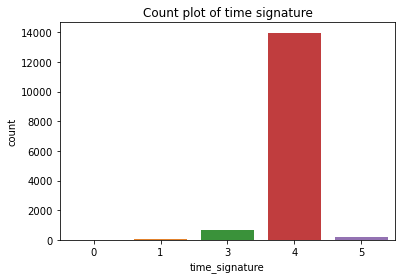

(3, 67, 684, 13977, 195)

In [77]:
# count plot of categorical feature "time_signature"
l0 =len(df2[df2.time_signature==0])
l1 =len(df2[df2.time_signature==1])
l3 =len(df2[df2.time_signature==3])
l4 =len(df2[df2.time_signature==4])
l5 =len(df2[df2.time_signature==5])
sns.countplot(x="time_signature", data=df2).set(title="Count plot of time signature")
plt.show()
l0,l1,l3,l4,l5

- Above plot shows that 13977 songs have time_signature 4 and only 3 songs have time_signature of 0

## 5.2 Visualizing numerical features

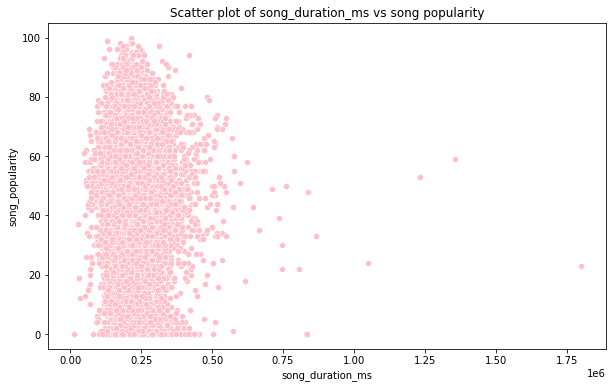

In [193]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="song_duration_ms",y="song_popularity", data=df2, color="pink").set(title="Scatter plot of song_duration_ms vs song popularity")
plt.show()

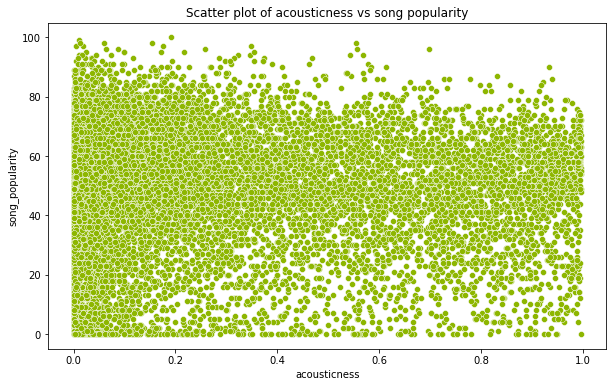

In [196]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="acousticness",y="song_popularity", data=df2,color="#8db600").set(title="Scatter plot of acousticness vs song popularity")
plt.show()

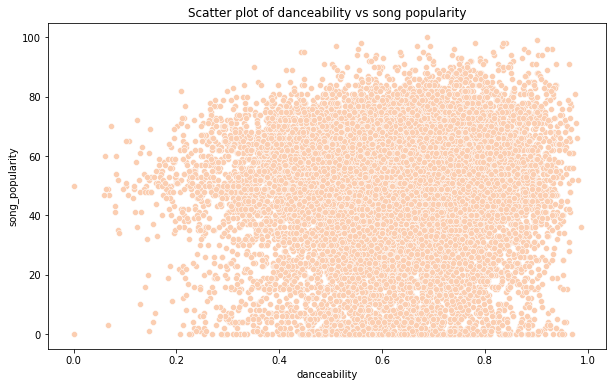

In [197]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="danceability",y="song_popularity", data=df2, color="#fbceb1").set(title="Scatter plot of danceability vs song popularity")
plt.show()

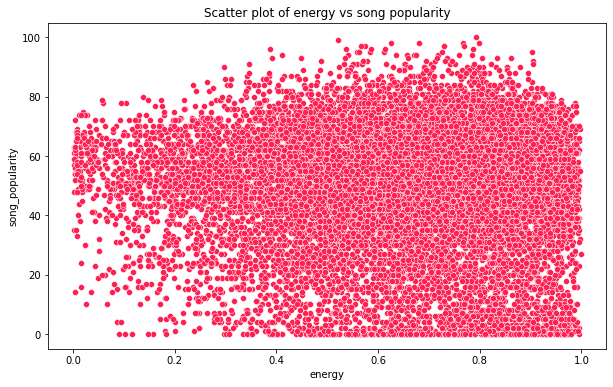

In [198]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="energy",y="song_popularity", data=df2, color="#ff2052").set(title="Scatter plot of energy vs song popularity")
plt.show()

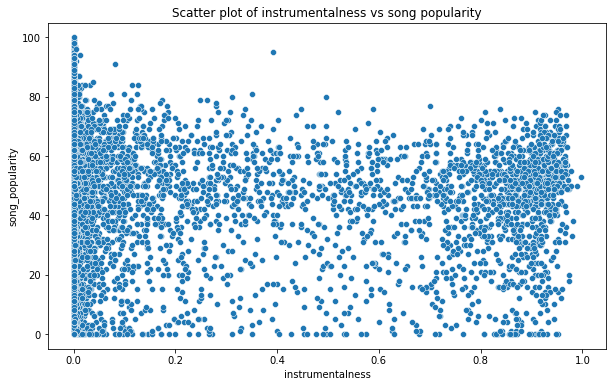

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="instrumentalness",y="song_popularity", data=df2).set(title="Scatter plot of instrumentalness vs song popularity")
plt.show()

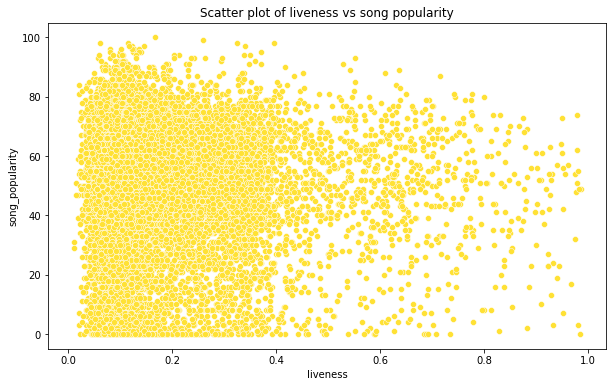

In [199]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="liveness",y="song_popularity", data=df2, color="#ffe135").set(title="Scatter plot of liveness vs song popularity")
plt.show()

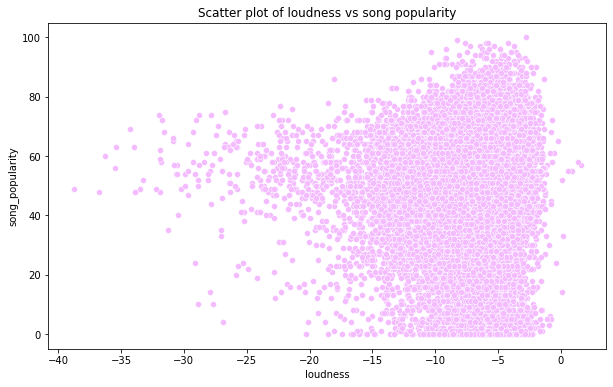

In [202]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="loudness",y="song_popularity", data=df2, color="#f4bbff").set(title="Scatter plot of loudness vs song popularity")
plt.show()

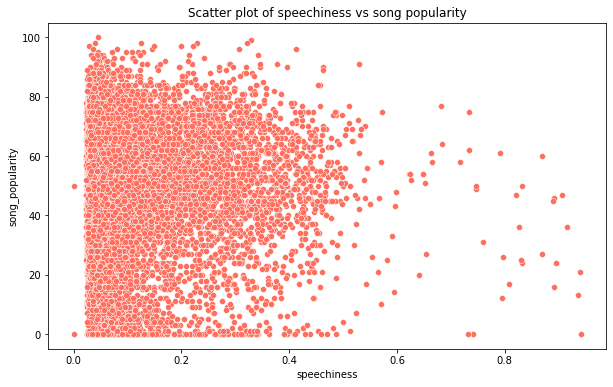

In [200]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="speechiness",y="song_popularity", data=df2, color="#fe6f5e").set(title="Scatter plot of speechiness vs song popularity")
plt.show()

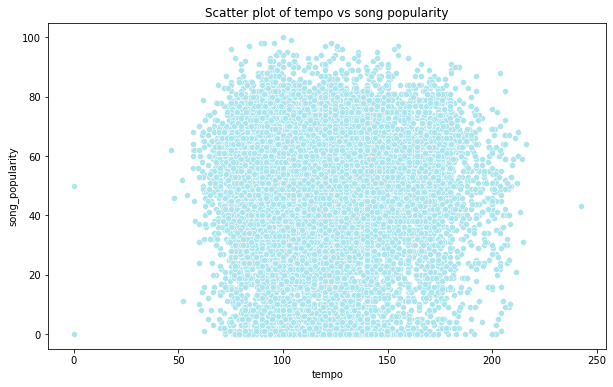

In [201]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="tempo",y="song_popularity", data=df2, color="#ace5ee").set(title="Scatter plot of tempo vs song popularity")
plt.show()

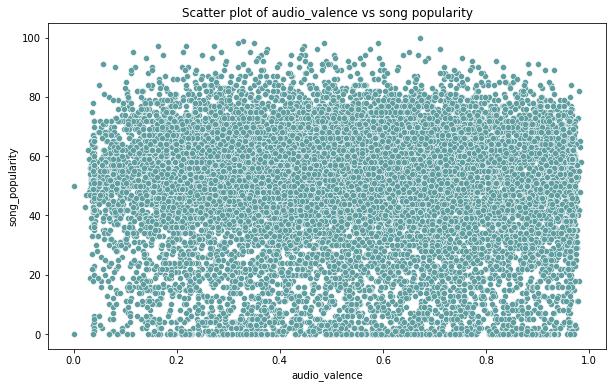

In [203]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="audio_valence",y="song_popularity", data=df2, color="#5f9ea0").set(title="Scatter plot of audio_valence vs song popularity")
plt.show()

## 5.3 Heatmap 

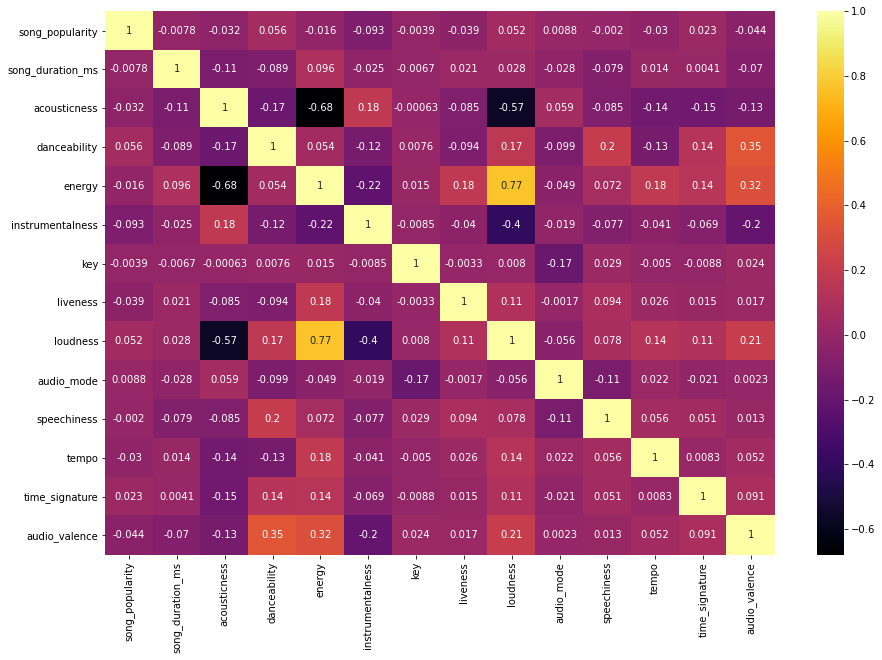

In [91]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True, cmap="inferno")
plt.show()

- This heatmap shows that there is a strong multicollinearity between the features

In [175]:
df2.head(3)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324


In [176]:
df3 = df2.copy()

In [177]:
duration_s = df3.song_duration_ms/1000

In [181]:
duration = duration_s.astype(int).to_numpy()

In [182]:
df3["song_duration_sec"] = duration

In [183]:
df3 = df3.drop("song_duration_ms", axis=1)
df3.head()

,song_name,song_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_duration_sec
0,Boulevard of Broken Dreams,73,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,262
1,In The End,66,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,216
2,Seven Nation Army,76,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,231
3,By The Way,74,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,216
4,How You Remind Me,56,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,223


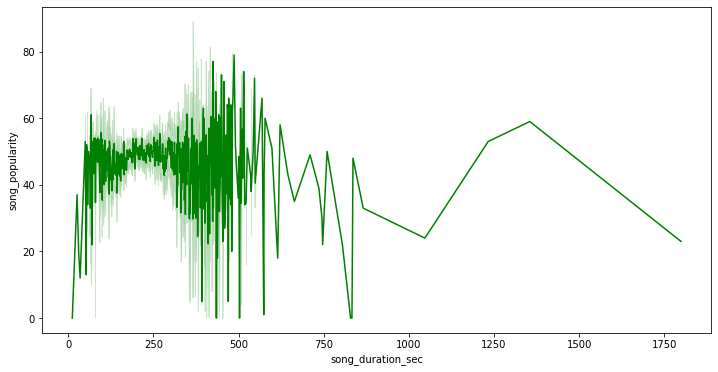

In [192]:
# lineplot of song_duration_sec vs song_popularity
plt.figure(figsize=(12,6))
sns.lineplot(x="song_duration_sec", y="song_popularity", data=df3, color="green")
plt.show()

- This line graph shows that as the duration of song increases above 1400 the popularity decreases linearly 

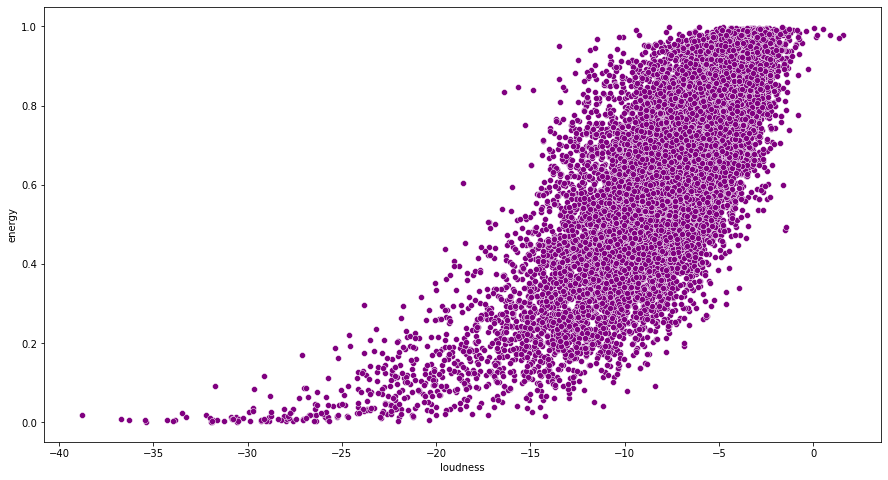

In [191]:
# scatter plot between loudness and enrgy
plt.figure(figsize=(15,8))
sns.scatterplot(x="loudness", y="energy", data=df3, color="purple")
plt.show()

- There is a linear relationship between loudness and energy of the songs

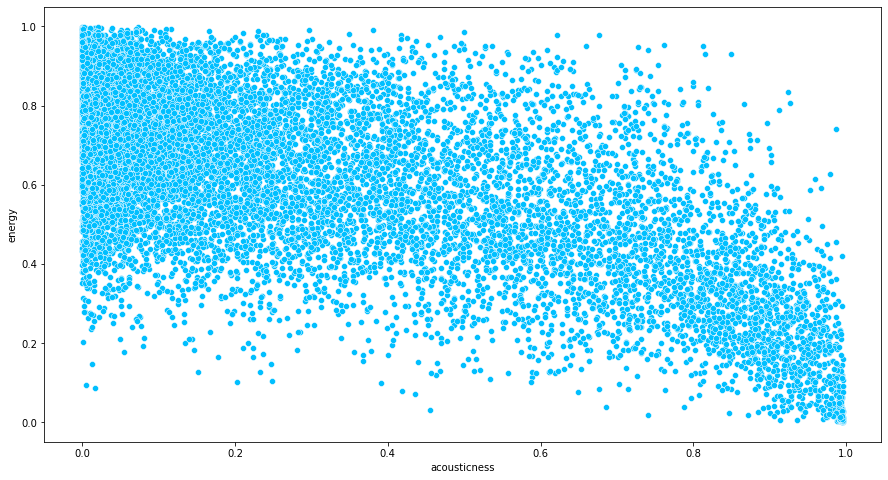

In [204]:
# scatter plot between acousticness and enrgy
plt.figure(figsize=(15,8))
sns.scatterplot(x="acousticness", y="energy", data=df3, color="#00bfff")
plt.show()

- As the acousticness increases energy of the song decreases

In [242]:
# creating a dictionary to hold the counts of key values
key_counts = {}
for i in range(0,12) :
    l = len(df3[df3.key==i])
    key_counts[i] = l

In [232]:
key_vals = key_counts.values()
key_no = key_counts.keys()

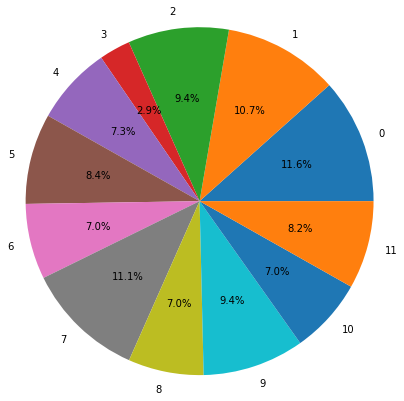

In [243]:
# creating pie chart of key 
plt.pie(key_vals, labels=key_no, autopct='%1.1f%%', radius=2)
plt.show()

# Results of EDA

### Features Information
- There are total 13 features in which 10 are numerical and 3 are categorical
- Categorical features are : key, audio_mode, time_signature
- Numerical features are : acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, audio_valence, song_duration_sec

### Categorical Features 
- key : There are total 12 keys, 11.6% songs have key value of 0 and only 2.9% songs have key value 3
- audio_mode : 9432 songs have audio_mode 1 and the rest 5494 have audio_mode 0
- time_signature : (0,1,3,4,5) [time signature values] --> (3, 67, 684, 13977, 195) [song counts]

### Numerical features
- Most of the numerical features have high multicollinearity with each other
- As the duration of song increases above a certain level there is linear drop in song popularity
- Energy and loudness have a high coorelation of 77% , also we can see it in the scatter plot of energy vs loudness
- Energy and acousticness have a negative correlation of -68%

# 6. Data Preprocesing

In [292]:
df4  = df.copy()

In [293]:
df4.head(3)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324


## 6.1 Removing duplicates

In [294]:
# original shape
x1,y1 = df4.shape
x1,y1

(18835, 15)

In [295]:
# dropping song_name column
df4 = df4.drop("song_name", axis=1)

In [296]:
# dropping duplicates
df4 = df4.drop_duplicates()

In [299]:
x2,y2 = df4.shape
x2,y2

(14924, 14)

In [301]:
# no of duplicates
no_duplicates = x1-x2
no_duplicates

3911

In [302]:
df4.head(3)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324


## 6.2 One Hot Encoding

In [303]:
categorical_features

['key', 'audio_mode', 'time_signature']

In [304]:
numerical_features

['song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'audio_valence']

In [305]:
key_val = [f"key_{i}" for i in range(0,12)]
time_sign = [f"time_sign_{i}" for i in [0,1,3,4,5]]

In [306]:
# converting categorical features key and time_signature to numerical features using one hot encoding
dummy_key = pd.get_dummies(df4.key, prefix="key", drop_first=True)
dummy_signature = pd.get_dummies(df4.time_signature, prefix="time_signature", drop_first=True)

In [307]:
df5 = pd.concat([df4, dummy_key, dummy_signature], axis=1)

In [308]:
df5 = df5.drop(["key", "time_signature"], axis=1)

In [309]:
df5.head(3)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,audio_valence,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,73,262333,0.00552,0.496,0.682,0.000029,0.0589,-4.095,1,0.0294,167.060,0.474,...,0,0,0,0,1,0,0,0,0,0,1,0
1,66,216933,0.01030,0.542,0.853,0.000000,0.1080,-6.407,0,0.0498,105.256,0.370,...,0,0,0,0,0,0,0,0,0,0,1,0
2,76,231733,0.00817,0.737,0.463,0.447000,0.2550,-7.828,1,0.0792,123.881,0.324,...,0,0,0,0,0,0,0,0,0,0,1,0


In [310]:
df5.columns

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'audio_valence', 'key_1', 'key_2', 'key_3',
       'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5'],
      dtype='object')

## 6.3 Outlier removal

In [312]:
df6 = df5.copy()

In [313]:
(x3,y3) = df6.shape
x3,y3

(14924, 27)

In [314]:
numerical_features

['song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'audio_valence']

In [315]:
# using IQR for outlier removal
for col in numerical_features :
    q1 = df5[col].quantile(0.25)
    q3 = df5[col].quantile(0.75)
    IQR = q3-q1
    df5 = df5[df5[col] >= (q1 - 1.5*IQR)]
    df5 = df5[df5[col] <= (q3 + 1.5*IQR)]
    df5 = df5.reset_index(drop=True)

In [317]:
(x4, y4) = df5.shape
x4,y4

(8932, 27)

In [321]:
print(f"Shape at beginning : ({x1}, {y1})")
print(f"Shape after dropping duplicates : ({x2}, {y2})")
print(f"Shape after outlier removal : ({x4}, {y4})")
print(f"Total duplicates : ({x1-x2})")
print(f"Total outliers : ({x2-x4})")

Shape at beginning : (18835, 15)
Shape after dropping duplicates : (14924, 14)
Shape after outlier removal : (8932, 27)
Total duplicates : (3911)
Total outliers : (5992)


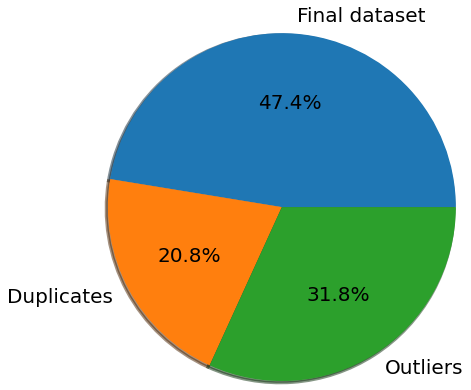

In [329]:
list_shape = [x4, x1-x2, x2-x4]
list_names = ["Final dataset", "Duplicates", "Outliers"]
plt.pie(x =list_shape, labels=list_names, radius=2, autopct='%1.1f%%',shadow=True, wedgeprops = {'linewidth': 3}, textprops={"fontsize" : 20})
plt.show()

# Results of data preprocessing
- After data preprocessing we converted categorical features into numerical features
- We found out that there are 20.8% duplicates and 31.8% outliers in our dataset
- Hence the final dataset only contains 47.4% of data i.e. 8932 rows and 27 columns

# 7. Data Manipulation

In [330]:
df6 = df5.copy()

In [331]:
df6.head(4)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,audio_valence,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,1,0.0294,167.060,0.474,...,0,0,0,0,1,0,0,0,0,0,1,0
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0,0.0498,105.256,0.370,...,0,0,0,0,0,0,0,0,0,0,1,0
2,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,1,0.1070,122.444,0.198,...,0,0,0,0,0,0,0,0,0,0,1,0
3,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,1,0.0313,172.011,0.574,...,0,0,0,0,0,0,1,0,0,0,1,0


In [332]:
X = df6.drop("song_popularity", axis=1)
y = df6.song_popularity

## 7.1 Splicing of data

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [352]:
print(f"X training dataset : {X_train.shape}")
print(f"X testing dataset : {X_test.shape}")
print(f"y training dataset : {y_train.shape}")
print(f"y testing dataset : {y_test.shape}")

X training dataset : (7145, 26)
X testing dataset : (1787, 26)
y training dataset : (7145,)
y testing dataset : (1787,)


## 7.2 Standardization

In [361]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [363]:
# scaling training dataset
scaling_xTrain = scaler.fit_transform(X_train)
scaled_training_data = pd.DataFrame(scaling_xTrain, columns=X_train.columns)

In [364]:
scaled_training_data.head(3)

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,audio_valence,key_1,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,1.540832,-0.874725,-0.470020,0.524314,4.161519,-0.822095,-0.999065,0.739508,-0.710340,-0.711154,0.569100,2.964401,...,-0.275779,-0.312048,-0.271049,-0.359317,-0.284783,-0.331906,-0.263231,-0.302500,-0.051636,-0.200451,0.231017,-0.097293
1,0.768248,0.353595,0.388101,-1.036307,1.660584,-0.455681,-0.487265,0.739508,1.038764,1.379114,-0.926571,-0.337336,...,-0.275779,-0.312048,-0.271049,-0.359317,3.511442,-0.331906,-0.263231,-0.302500,-0.051636,-0.200451,0.231017,-0.097293
2,-0.049589,-0.318230,1.671850,-0.023454,-0.358690,-0.631344,0.256260,-1.352251,1.075626,0.139587,0.598102,-0.337336,...,-0.275779,-0.312048,-0.271049,-0.359317,-0.284783,-0.331906,-0.263231,3.305785,-0.051636,-0.200451,0.231017,-0.097293


In [365]:
scaled_training_data.describe()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,audio_valence,key_1,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
count,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,...,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03,7.145000e+03
mean,2.146328e-16,-7.441369e-17,-4.409038e-16,1.879843e-16,3.864260e-16,1.040921e-16,-1.474600e-16,8.874326e-16,-2.506354e-16,-2.370120e-16,1.917446e-16,3.851518e-16,...,3.187249e-16,-9.656920e-16,-1.103557e-15,-3.446275e-16,8.697032e-16,-4.435764e-16,2.017141e-15,-9.405430e-17,-1.987622e-16,-3.309925e-16,-9.636565e-16,-3.703243e-16
std,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,...,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00
min,-2.934453e+00,-9.265925e-01,-2.913949e+00,-3.104389e+00,-3.586895e-01,-1.545224e+00,-2.777722e+00,-1.352251e+00,-9.444136e-01,-2.233856e+00,-2.135950e+00,-3.373363e-01,...,-2.757793e-01,-3.120476e-01,-2.710490e-01,-3.593170e-01,-2.847833e-01,-3.319060e-01,-2.632311e-01,-3.025000e-01,-5.163615e-02,-2.004508e-01,-4.328691e+00,-9.729312e-02
25%,-6.667585e-01,-8.262047e-01,-6.485094e-01,-6.797413e-01,-3.586895e-01,-6.949275e-01,-5.832272e-01,-1.352251e+00,-6.919087e-01,-7.573677e-01,-7.981335e-01,-3.373363e-01,...,-2.757793e-01,-3.120476e-01,-2.710490e-01,-3.593170e-01,-2.847833e-01,-3.319060e-01,-2.632311e-01,-3.025000e-01,-5.163615e-02,-2.004508e-01,2.310167e-01,-9.729312e-02
50%,-6.451183e-02,-4.115394e-01,5.858235e-02,1.212398e-01,-3.563924e-01,-3.910194e-01,1.803827e-01,7.395077e-01,-4.099141e-01,-1.893931e-02,-6.795546e-03,-3.373363e-01,...,-2.757793e-01,-3.120476e-01,-2.710490e-01,-3.593170e-01,-2.847833e-01,-3.319060e-01,-2.632311e-01,-3.025000e-01,-5.163615e-02,-2.004508e-01,2.310167e-01,-9.729312e-02
75%,5.925728e-01,6.073952e-01,7.244843e-01,8.033657e-01,-2.651360e-01,4.819081e-01,7.327260e-01,7.395077e-01,2.886215e-01,6.507390e-01,8.259737e-01,-3.373363e-01,...,-2.757793e-01,-3.120476e-01,-2.710490e-01,-3.593170e-01,-2.847833e-01,-3.319060e-01,-2.632311e-01,-3.025000e-01,-5.163615e-02,-2.004508e-01,2.310167e-01,-9.729312e-02
max,2.953346e+00,2.746038e+00,2.385807e+00,1.723202e+00,6.217844e+00,3.014476e+00,2.360372e+00,7.395077e-01,3.361072e+00,2.772381e+00,1.795466e+00,2.964401e+00,...,3.626088e+00,3.204640e+00,3.689370e+00,2.783058e+00,3.511442e+00,3.012901e+00,3.798943e+00,3.305785e+00,1.936628e+01,4.988755e+00,2.310167e-01,1.027822e+01


In [367]:
# scaling test data
scaling_xTest = scaler.transform(X_test)
scaled_testing_data = pd.DataFrame(scaling_xTest, columns=X_test.columns)

In [368]:
scaled_testing_data.head(3)

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,audio_valence,key_1,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.680750,-0.699304,0.099772,0.451967,-0.354605,-0.552673,1.300319,0.739508,-0.739829,-0.558740,0.030493,-0.337336,...,-0.275779,-0.312048,-0.271049,-0.359317,-0.284783,-0.331906,-0.263231,-0.3025,-0.051636,-0.200451,0.231017,-0.097293
1,-0.171422,-0.925045,1.513956,-0.452366,-0.254021,0.040056,-1.174253,-1.352251,0.367875,0.434546,-0.218095,-0.337336,...,-0.275779,-0.312048,-0.271049,-0.359317,-0.284783,-0.331906,-0.263231,-0.3025,-0.051636,-0.200451,0.231017,-0.097293
2,-0.919717,-0.284639,-0.284666,-0.473036,-0.358690,-0.531119,-0.144328,0.739508,1.849729,-0.561686,-0.516401,2.964401,...,-0.275779,-0.312048,-0.271049,-0.359317,-0.284783,-0.331906,-0.263231,-0.3025,-0.051636,-0.200451,0.231017,-0.097293


In [369]:
scaled_testing_data.describe()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,audio_valence,key_1,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
count,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,...,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000
mean,-0.000083,-0.006326,0.023493,-0.002048,0.028226,-0.058602,-0.009108,0.000896,0.017259,0.014850,0.058108,0.035887,...,0.021173,-0.018826,0.001548,-0.019934,0.006254,-0.054888,0.018643,-0.040006,0.002695,-0.000084,0.019234,-0.045038
std,1.039525,1.019576,1.017345,1.015355,1.048384,0.977301,1.001213,1.000005,1.033001,0.991202,0.998415,1.045755,...,1.034934,0.972480,1.002922,0.975613,1.010302,0.922122,1.032553,0.937413,1.025979,1.000078,0.959860,0.734672
min,-2.889248,-0.926593,-2.893354,-3.203090,-0.358690,-1.473019,-2.768424,-1.352251,-0.937041,-2.504843,-2.111920,-0.337336,...,-0.275779,-0.312048,-0.271049,-0.359317,-0.284783,-0.331906,-0.263231,-0.302500,-0.051636,-0.200451,-4.328691,-0.097293
25%,-0.692479,-0.823219,-0.648509,-0.684909,-0.358690,-0.707860,-0.631580,-1.352251,-0.688222,-0.757865,-0.744273,-0.337336,...,-0.275779,-0.312048,-0.271049,-0.359317,-0.284783,-0.331906,-0.263231,-0.302500,-0.051636,-0.200451,0.231017,-0.097293
50%,-0.085234,-0.433934,0.099772,0.121240,-0.356411,-0.444904,0.190053,0.739508,-0.433874,-0.006493,0.080210,-0.337336,...,-0.275779,-0.312048,-0.271049,-0.359317,-0.284783,-0.331906,-0.263231,-0.302500,-0.051636,-0.200451,0.231017,-0.097293
75%,0.608806,0.523417,0.786269,0.808533,-0.233643,0.357974,0.745000,0.739508,0.313503,0.609146,0.859119,-0.337336,...,-0.275779,-0.312048,-0.271049,-0.359317,-0.284783,-0.331906,-0.263231,-0.302500,-0.051636,-0.200451,0.231017,-0.097293
max,2.944611,2.749770,2.275967,1.723202,6.199318,3.014476,2.412817,0.739508,3.361072,2.764611,1.803753,2.964401,...,3.626088,3.204640,3.689370,2.783058,3.511442,3.012901,3.798943,3.305785,19.366276,4.988755,0.231017,10.278219


# Results of data manipulation 
- In this process we split our data into training and testing data
- X training dataset : (7145, 26)
- X testing dataset : (1787, 26)
- y training dataset : (7145,)
- y testing dataset : (1787,)
- Also we perform standardization on our training and testing data which converts every value in a range of (-3,3)

# 8. Feature extraction using PCA

In [411]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

In [412]:
df_pca_training = scaled_training_data
df_pca_training.shape

(7145, 26)

In [413]:
new_df_pca = pca.fit_transform(df_pca_training)
new_df_pca.shape

(7145, 22)

In [414]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(new_df_pca,y_train,test_size=0.2, random_state=42)

In [415]:
reg = LinearRegression()
reg.fit(X_pca_train,y_pca_train)

LinearRegression()

In [416]:
reg.score(X_pca_train,y_pca_train)

0.027196052186871156

# 9. Model Creation

In [370]:
X_train = scaled_training_data
X_test = scaled_testing_data
y_train = y_train
y_test = y_test

In [371]:
regressor = LinearRegression()
regressor.fit(X_trainin, y_train)

LinearRegression()

In [372]:
print(f"Coefficients of Linear Regression : {regressor.coef_}")
print(f"Intercept of Linear Regression : {regressor.intercept_}")

Coefficients of Linear Regression : [ 6.46701581e-01 -1.36733810e+00  1.46796810e+00 -2.92985516e+00
 -5.44484415e-01 -7.01375434e-01  3.24271568e+00  6.03105505e-01
 -7.36360849e-02 -2.06583104e-01 -1.08117948e+00  1.57982697e-01
 -4.25696822e-01 -1.26911988e-01 -1.15679391e-01 -2.59937431e-01
  4.53645605e-01 -4.60936944e-01 -5.16608380e-02 -4.49526594e-01
  4.50571267e-02  1.94400364e-01  4.75590820e+11  1.77965186e+12
  2.02534470e+12  8.90074655e+11]
Intercept of Linear Regression : 50.568172969866836


In [388]:
regressor.score(X_train, y_train)

0.033688037235694024

In [389]:
regressor.score(X_test, y_test)

0.031609792943885995

# Score of Linear Regression model
- 3%